<a href="https://colab.research.google.com/github/Zetech21/Data-Journey/blob/main/Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Modules

In [ ]:
!pip install umap-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly.figure_factory as ff
import umap
import seaborn
import matplotlib.pyplot as plt

#About our Dataset

##Loading Dataset using Google Drive

In [ ]:
link = 'https://drive.google.com/file/d/1ZDeMuQPoTUdAjdfRuQYhJFBtBMcB80IN/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
Claims = pd.read_csv(path)


##Dataset Details

In [ ]:
print(Claims.head())
print(Claims.shape)
print(Claims.info())
print(Claims.describe())

   months_as_customer  age  ... vehicle_claim  fraud_reported
0                 328   48  ...         52080               Y
1                 228   42  ...          3510               Y
2                 134   29  ...         23100               N
3                 256   41  ...         50720               Y
4                 228   44  ...          4550               N

[5 rows x 21 columns]
(1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductible            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex        

##Visualizing Dataset


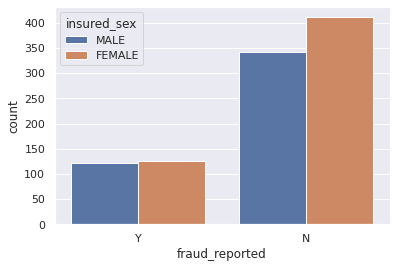

In [ ]:
Fr_report_1 = seaborn.countplot(x='fraud_reported',data = Claims, hue = 'insured_sex')


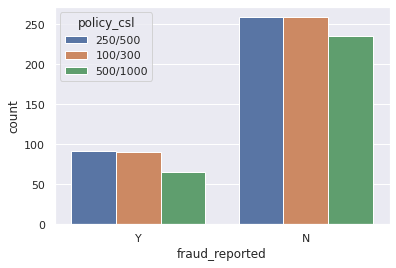

In [ ]:
Fr_report_2 = seaborn.countplot(x='fraud_reported',data = Claims, hue = 'policy_csl')


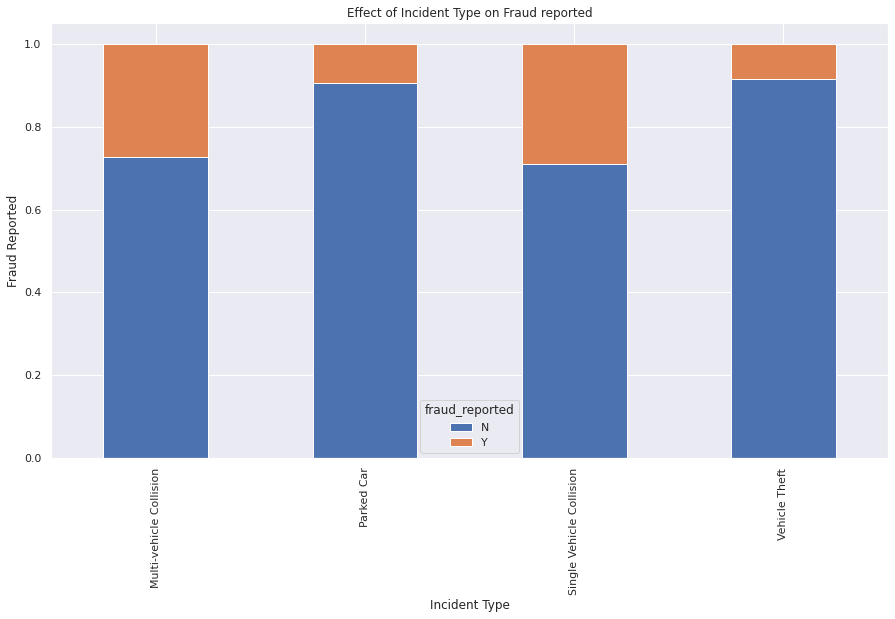

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]
table = pd.crosstab(Claims.incident_type,Claims.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind = 'bar',stacked = True)
plt.title("Effect of Incident Type on Fraud reported")
plt.xlabel("Incident Type")
plt.ylabel("Fraud Reported")
plt.show()

##Corellation

In [ ]:
Claims['insured_sex'] = Claims['insured_sex'].map({'MALE': 0, 'FEMALE':1})
Claims['fraud_reported'] = Claims['fraud_reported'].map({'Y': 1, 'N':0})

In [ ]:
Correlation = Claims.corr()
Correlation_Heatmap = ff.create_annotated_heatmap(z=Correlation.values,x=list(Correlation.columns),y=list(Correlation.index),annotation_text=Correlation.round(2).values,showscale=True)
Correlation_Heatmap.show()

#UMAP of Dataset


## Reshapping Categorical Features

In [ ]:
Cat_FT = ['insured_education_level', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity','authorities_contacted']
Claims_Final = pd.get_dummies(Claims, columns = Cat_FT)
Claims_Final.head()

,months_as_customer,age,policy_csl,policy_deductible,policy_annual_premium,umbrella_limit,insured_sex,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,insured_education_level_Doctorate,insured_education_level_Graduate,insured_education_level_High School,insured_education_level_Undergraduate,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_partner,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_No Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Police
0,328,48,250/500,1000,1406.91,0,0,5,1,2,71610,6510,13020,52080,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
1,228,42,250/500,2000,1197.22,5000000,0,8,1,0,5070,780,780,3510,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
2,134,29,100/300,2000,1413.14,5000000,1,7,3,3,34650,7700,3850,23100,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,256,41,250/500,2000,1415.74,6000000,1,5,1,2,63400,6340,6340,50720,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
4,228,44,500/1000,1000,1583.91,6000000,0,20,1,1,6500,1300,650,4550,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [ ]:
Claims_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_csl                              1000 non-null   object 
 3   policy_deductible                       1000 non-null   int64  
 4   policy_annual_premium                   1000 non-null   float64
 5   umbrella_limit                          1000 non-null   int64  
 6   insured_sex                             1000 non-null   int64  
 7   incident_hour_of_the_day                1000 non-null   int64  
 8   number_of_vehicles_involved             1000 non-null   int64  
 9   witnesses                               1000 non-null   int64  
 10  total_claim_amount                      1000 non-null   int64

##Subsets Selection

In [ ]:
#Personal
subset1 = Claims_Final[['age','insured_sex','insured_education_level_Doctorate', 'insured_education_level_Graduate','insured_education_level_High School',
                        'insured_education_level_Undergraduate','insured_relationship_not-in-family','insured_relationship_other-relative', 'insured_relationship_own-child','insured_relationship_partner']]
#Claim
subset2 = Claims_Final[['property_claim','vehicle_claim','policy_deductible','policy_annual_premium','umbrella_limit']]####'injury_claim',

#Accident
subset3 = Claims_Final[['incident_type_Multi-vehicle Collision','incident_type_Parked Car','incident_type_Single Vehicle Collision','incident_type_Vehicle Theft','collision_type_Front Collision',
                       'collision_type_No Collision','collision_type_Rear Collision','collision_type_Side Collision','incident_severity_Major Damage','incident_severity_Minor Damage','incident_severity_Total Loss',
                       'incident_severity_Trivial Damage','witnesses','incident_hour_of_the_day']]


##Normalizing numerical features

In [ ]:
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)

##Analysis on SubSet 1 - Personal Data
##Implementing UMAP to visualize dataset

In [ ]:
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
X1_umap = u.fit_transform(X1)

###Cluster Size

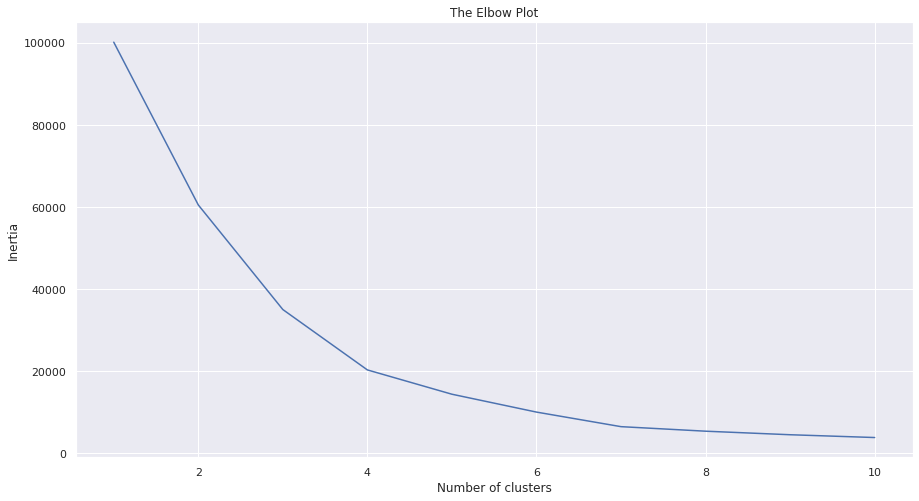

In [ ]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X1_umap)

age = list(Claims['age'])
insured_sex= list(Claims['insured_sex'])
insured_education_level = list(Claims['insured_education_level'])
insured_relationship = list(Claims['insured_relationship'])
fraud_reported=list(Claims['fraud_reported'])

data_sub_1 = [go.Scatter(x=X1_umap[:,0], y=X1_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Age: {a}; insured_sex: {b}; insured_education_level:{c}; insured_relationship:{d}; fraud_reported:{e}' for a,b,c,d,e in list(zip(age,insured_sex,insured_education_level,insured_relationship, fraud_reported))],
                                hoverinfo='text')]
layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data_sub_1, layout=layout)
fig.show()

##Analysis on SubSet 2 - Claims Data
##Implementing UMAP to visualize dataset

In [ ]:
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
X2_umap = u.fit_transform(X2)

###Cluster Size

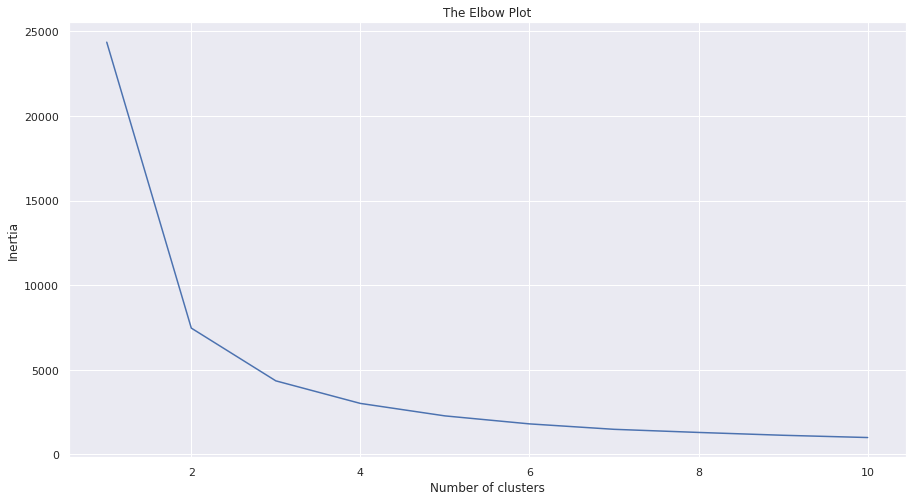

In [ ]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X2_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X2_umap)


Property_Claim = list(Claims['property_claim'])
Vehicle_claim= list(Claims['vehicle_claim'])
Policy_deductible = list(Claims['policy_deductible'])
Policy_Annual_Premium = list(Claims['policy_annual_premium'])
Umbrella_Limit = list(Claims['umbrella_limit'])
fraud_reported=list(Claims['fraud_reported'])

data_sub_1 = [go.Scatter(x=X2_umap[:,0], y=X2_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Property_Claim: {a}; Vehicle_claim: {b}; Policy_deductible:{c}; Policy_Annual_Premium:{d};Umbrella_Limit: {e}; fraud_reported:{f}' for a,b,c,d,e,f in list(zip(Property_Claim,Vehicle_claim,Policy_deductible,Policy_Annual_Premium,Umbrella_Limit,fraud_reported))],
                                hoverinfo='text')]
layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data_sub_1, layout=layout)
fig.show()

##Analysis on SubSet 3 - Accidents Data
##Implementing UMAP to visualize dataset

In [ ]:
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
X3_umap = u.fit_transform(X3)

###Cluster Size

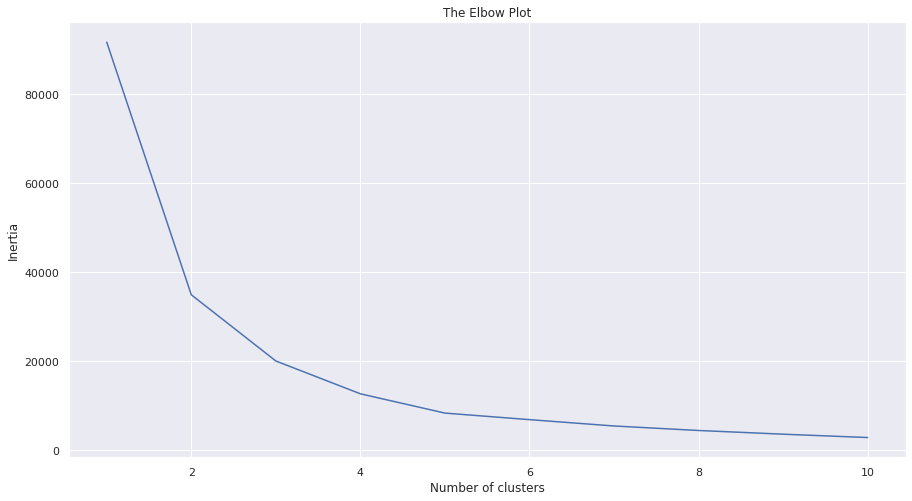

In [ ]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X3_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X3_umap)


Incident_Type = list(Claims['incident_type'])
Collision_Type= list(Claims['collision_type'])
Incident_Severity = list(Claims['incident_severity'])
Witnesses = list(Claims['witnesses'])
Incident_Hour_Of_The_Day = list(Claims['incident_hour_of_the_day'])
fraud_reported=list(Claims['fraud_reported'])

data_sub_1 = [go.Scatter(x=X3_umap[:,0], y=X3_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Incident_Type: {a}; Collision_Type: {b}; Incident_Severity:{c}; Witnesses:{d};Incident_Hour_Of_The_Day: {e}; fraud_reported:{f}' for a,b,c,d,e,f in list(zip(Incident_Type,Collision_Type,Incident_Severity,Witnesses,Incident_Hour_Of_The_Day,fraud_reported))],
                                hoverinfo='text')]
layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data_sub_1, layout=layout)
fig.show()